## Small Examples of Regression

### with NumPy

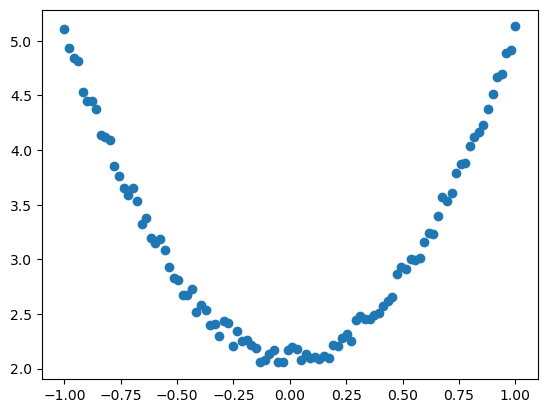

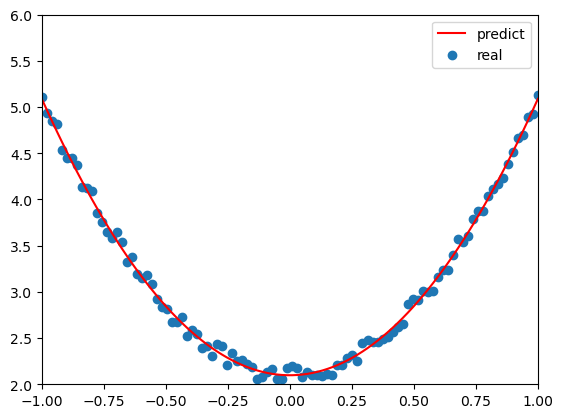

[[2.99034273]] [[2.09778792]]


In [12]:
import numpy as np
from matplotlib import pyplot as plt

np.random.seed(100)
x = np.linspace(-1,1,100).reshape(100,1)
y = 3*np.power(x,2) +2 +0.2*np.random.rand(x.size).reshape(100,1)  # noise

plt.scatter(x,y)
plt.show()

w1 = np.random.rand(1,1)
b1 = np.random.rand(1,1)

lr = 0.001
for i in range(888):
    y_pred = np.power(x,2)*w1 + b1
    loss = 0.5*(y_pred-y)**2
    grad_w = np.sum((y_pred-y)*np.power(x,2))
    grad_b = np.sum(y_pred-y)
    w1 -= lr*grad_w
    b1 -= lr*grad_b

plt.plot(x,y_pred,'r-',label = 'predict')
plt.scatter(x,y,marker = 'o',label = "real")
plt.xlim(-1,1)
plt.ylim(2,6)
plt.legend()
plt.show()
print(w1,b1)

### with Tensor and Antograd

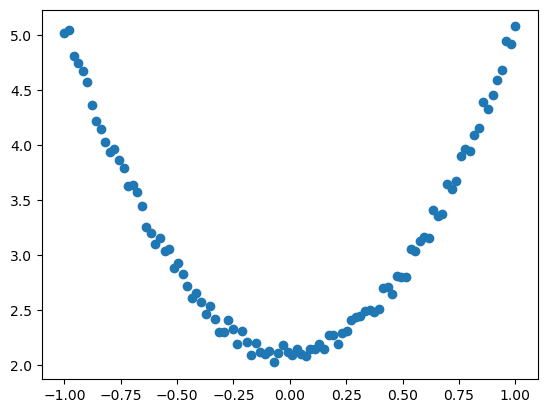

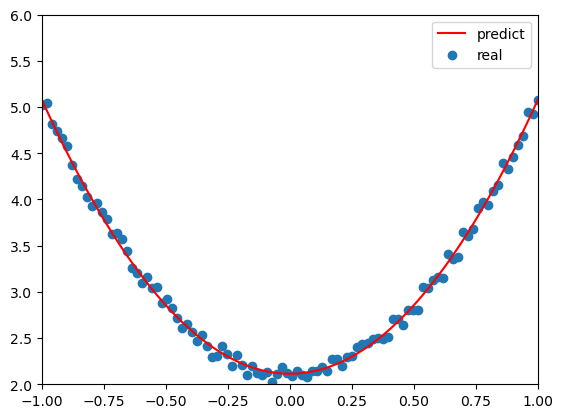

tensor([[2.9658]], requires_grad=True) tensor([[2.1142]], requires_grad=True)


In [16]:
import torch as t
from matplotlib import pyplot as plt

t.manual_seed(100)
dtype = t.float  # 在pytorch中，只有浮点类型的数才有梯度，因此在定义张量时一定要将类型指定为float型。
x = t.unsqueeze(t.linspace(-1,1,100),dim = 1)
y = 3*x.pow(2) + 2+0.2*t.rand(x.size())

plt.scatter(x.numpy(),y.numpy())  ##
plt.show()

w1 = t.randn(1,1,dtype = dtype, requires_grad = True) # requires_grad参数如果设置为True，则反向传播时，该tensor就会自动求导。
b1 = t.randn(1,1,dtype = dtype, requires_grad = True)

lr = 0.001
for i in range(888):
    y_pred = x.pow(2).mm(w1)+b1 ##
    loss = 0.5*(y_pred-y)**2
    loss = loss.sum()
    
    loss.backward() #反向传播函数，直接计算出梯度，存放在grad属性中。

    with t.no_grad():  # 在该模块下，所有计算得出的tensor的requires_grad都自动设置为False。
        w1 -= lr*w1.grad
        b1 -= lr*b1.grad

        w1.grad.zero_()
        b1.grad.zero_()   #梯度清零

plt.plot(x.numpy(),y_pred.detach().numpy(),'r-',label = "predict")
plt.scatter(x.numpy(),y.numpy(),marker = 'o',label = 'real')
plt.xlim(-1,1)
plt.ylim(2,6)
plt.legend()
plt.show()

print(w1,b1)

#### 关于torch.no_grad()

在该模块下，所有计算得出的tensor的requires_grad都自动设置为False。

In [14]:
import torch

x = torch.randn(10, 5, requires_grad = True)
y = torch.randn(10, 5, requires_grad = True)
z = torch.randn(10, 5, requires_grad = True)
with torch.no_grad():
    w = x + y + z
    print(w.requires_grad)
    print(w.grad_fn)
print(w.requires_grad)

False
None
False


### with TensorFlow

Step = 0,loss = 10.4702,weight = 0.0431,bias = 0.0311
Step = 200,loss = 0.3608,weight = 1.2569,bias = 2.4144
Step = 400,loss = 0.1833,weight = 1.5996,bias = 2.5817
Step = 600,loss = 0.1321,weight = 1.8190,bias = 2.5310
Step = 800,loss = 0.0960,weight = 1.9977,bias = 2.4679
Step = 1000,loss = 0.0701,weight = 2.1485,bias = 2.4124
Step = 1200,loss = 0.0514,weight = 2.2764,bias = 2.3650
Step = 1400,loss = 0.0380,weight = 2.3849,bias = 2.3248
Step = 1600,loss = 0.0283,weight = 2.4770,bias = 2.2907
Step = 1800,loss = 0.0214,weight = 2.5551,bias = 2.2618
Step = 2000,loss = 0.0163,weight = 2.6214,bias = 2.2372
Step = 2200,loss = 0.0127,weight = 2.6776,bias = 2.2164
Step = 2400,loss = 0.0101,weight = 2.7253,bias = 2.1987
Step = 2600,loss = 0.0083,weight = 2.7658,bias = 2.1837
Step = 2800,loss = 0.0069,weight = 2.8001,bias = 2.1710
Step = 3000,loss = 0.0060,weight = 2.8293,bias = 2.1602
Step = 3200,loss = 0.0053,weight = 2.8540,bias = 2.1510
Step = 3400,loss = 0.0048,weight = 2.8750,bias = 2.143

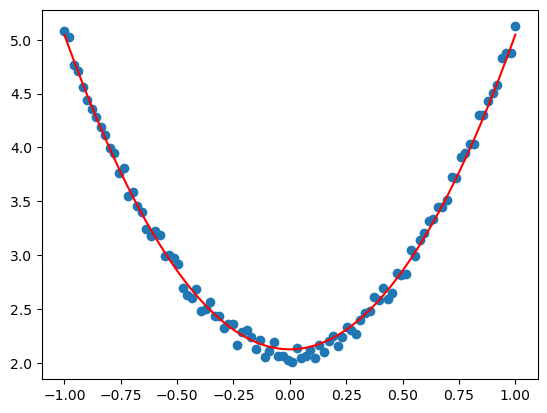

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)
x = np.linspace(-1,1,100).reshape(100,1)
x_square = x ** 2
y = 3*x_square + 2+ 0.2*np.random.rand(x.size).reshape(100,1)

w = tf.Variable(tf.random.uniform([1],0,1.0))
b = tf.Variable(tf.zeros([1]))

lr = 0.005  ## 0.001收敛太慢
for step in range(4000):
    with tf.GradientTape() as tape:
        y_pred = x_square * w +b
        loss = tf.reduce_mean(tf.square(y-y_pred))
    grad_w,grad_b = tape.gradient(loss,[w,b])
    w.assign_sub(lr * grad_w)
    b.assign_sub(lr * grad_b)

    if step%200 == 0:
        print(f"Step = {step},loss = {loss.numpy():.4f},weight = {w.numpy()[0]:.4f},bias = {b.numpy()[0]:.4f}")

final_w = w.numpy()[0]
final_b = b.numpy()[0]

plt.figure()
plt.scatter(x,y)
plt.plot(x,final_b+final_w*x**2,c = 'r')
plt.show()

### Lasso Regression

In [1]:
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

np.random.seed(11)
X = np.random.rand(100,1)*10
y = 2*X.squeeze() + 1 + np.random.randn(100)*2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 11)

lasso = Lasso(alpha = 0.1)
lasso.fit(X_train,y_train)
y_pred = lasso.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
print("Mean Squared Error:",mse)

Mean Squared Error: 2.674342791314716


### Polynomial Regression

In [2]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

np.random.seed(0)
X = np.random.rand(100,1)*10
y = 2*X.squeeze()**2+3*X.squeeze()+1 +np.random.randn(100)*5

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 11)

polynomial_features = PolynomialFeatures(degree = 2)
linear_regression = LinearRegression()
polynomial_regression = Pipeline([
    ("polynomial_features",polynomial_features),
    ("linear_regression",linear_regression)
])

polynomial_regression.fit(X_train,y_train)

y_pred = polynomial_regression.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
print("Mean Squared Error:",mse)

Mean Squared Error: 19.433288434150086


### SVM

In [3]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11)

svm = SVC(kernel = 'linear')
svm.fit(X_train,y_train)

y_pred = svm.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred))

Accuracy: 1.0


### Decision Tree

In [4]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 22)

clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

y_pred  = clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred))

Accuracy: 0.8666666666666667


### K-Means

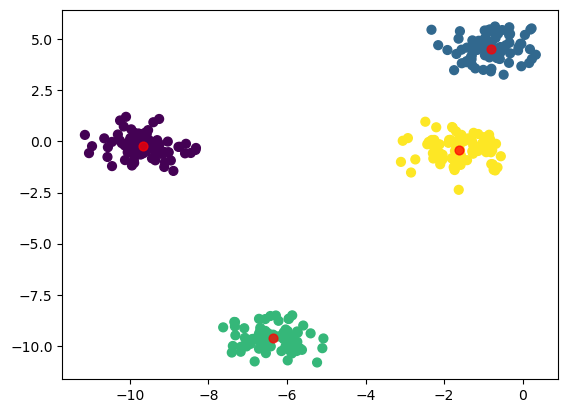

In [1]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples = 300, centers = 4, cluster_std = 0.60, random_state = 11)
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:,0],X[:,1],c = y_kmeans, s = 40, cmap = 'viridis') 

centers = kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c = 'red', s = 40, alpha = 0.75)
plt.show()